In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import os.path as op

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [3]:
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("results")) for f in fn]
results_files = [f for f in files if ".csv" in f]

In [4]:
tmp = []
for f in results_files:
    df_tmp = pd.read_csv(f)
    tmp.append(df_tmp)

In [5]:
df_concat = pd.concat(tmp)

In [6]:
df_concat['dataset'].value_counts()

natural      972
synthetic    972
Name: dataset, dtype: int64

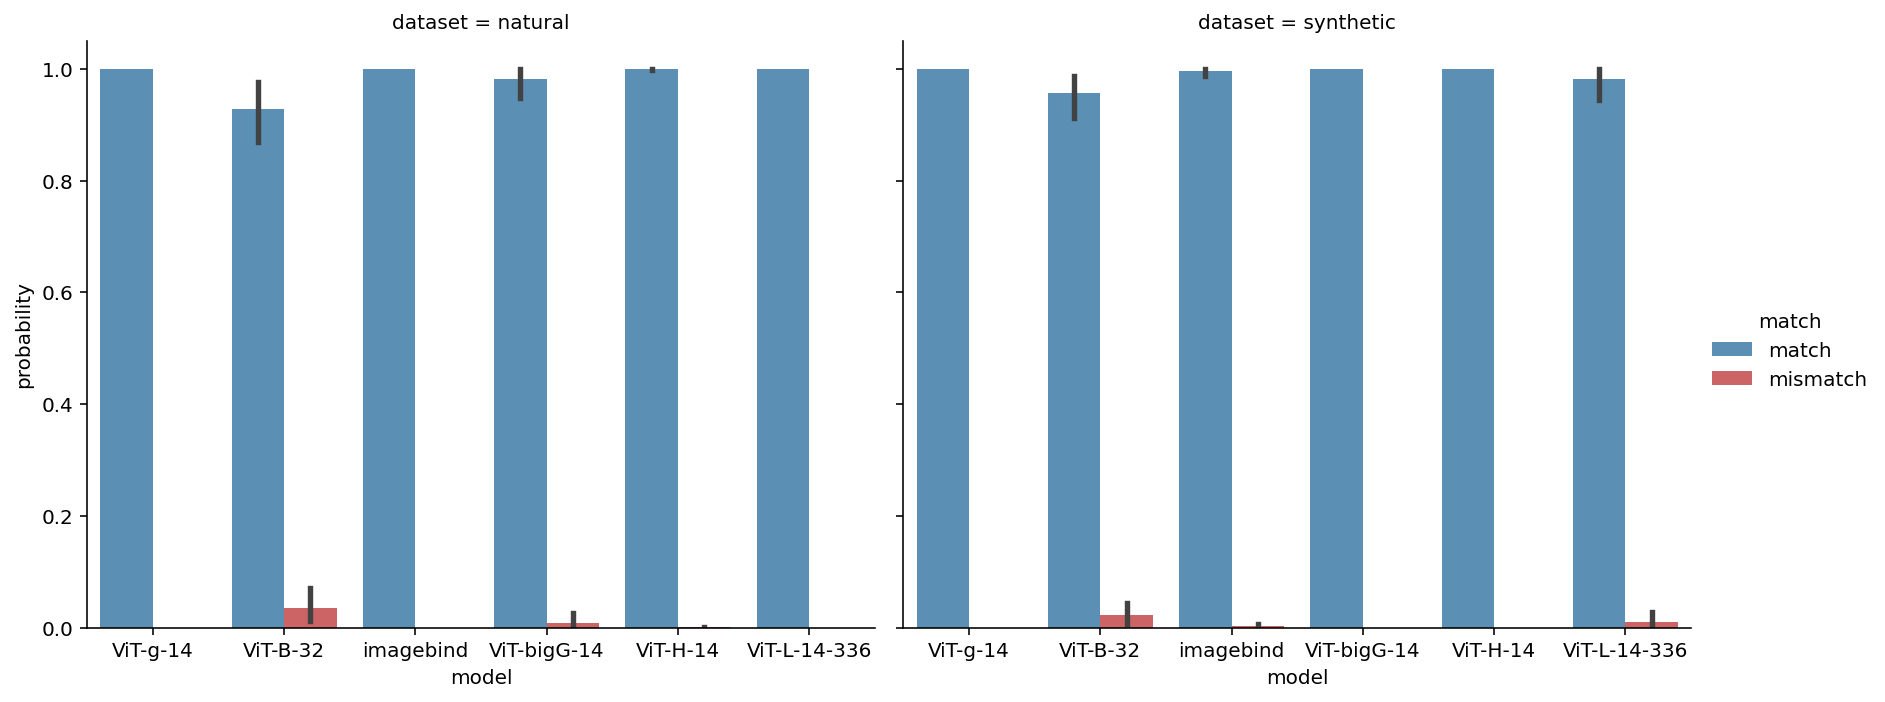

In [9]:
sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "match",
            col = "dataset",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'],
            alpha= 0.8)

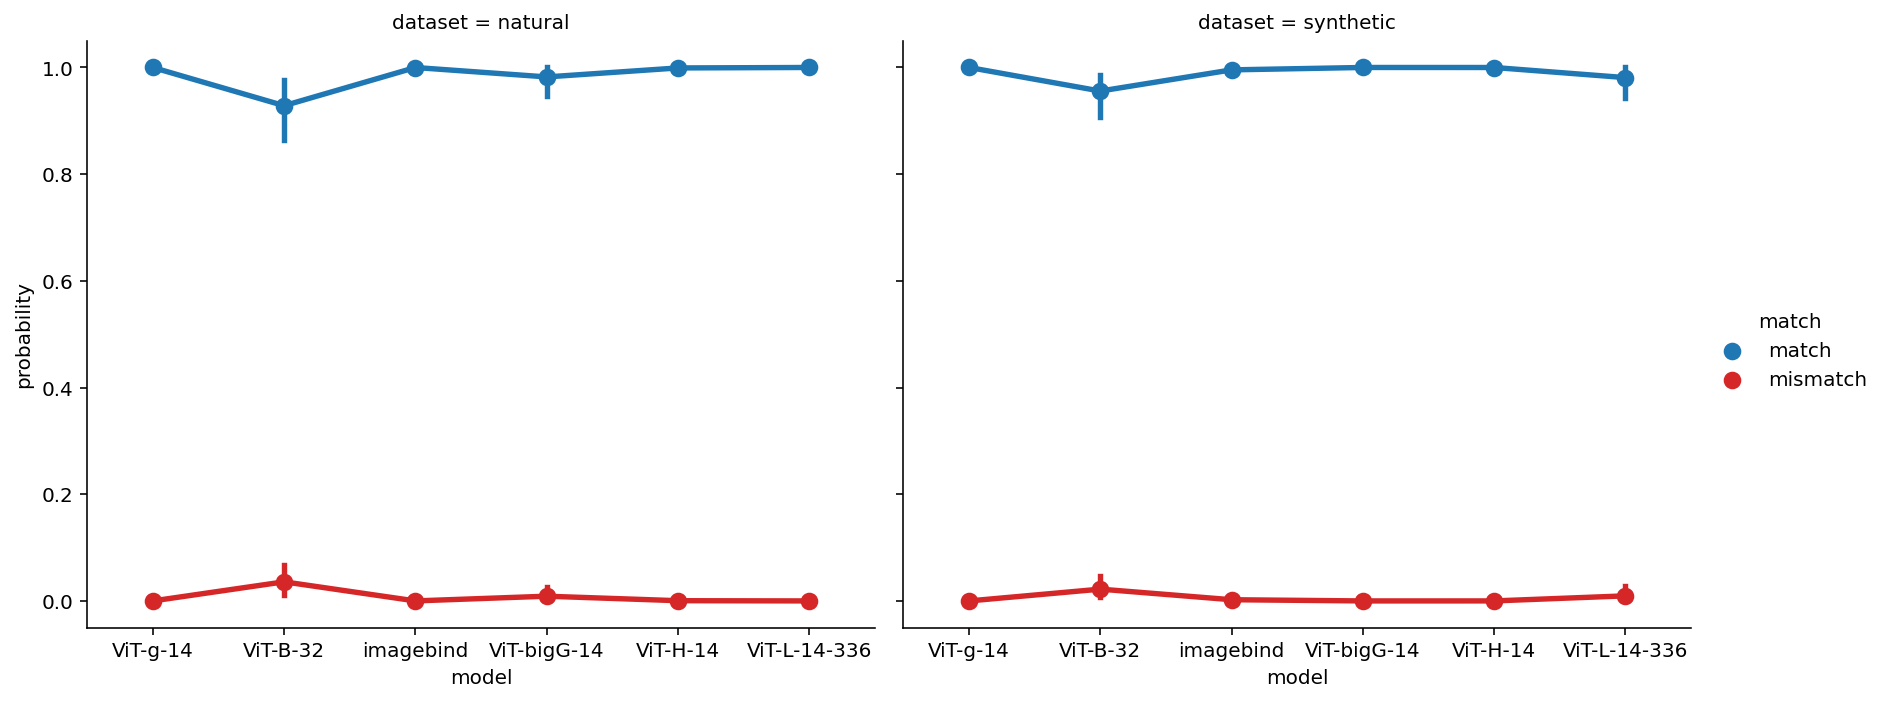

In [10]:
sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "match",
            col = "dataset",
            kind = "point",
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'])

In [11]:
df_concat.shape

(1944, 7)

In [13]:
df_concat[['match', 'probability', 'item_id', 'model', 'dataset']].to_csv("data/all_results.csv", index=False)